# Titanic Competition 🚤🚤

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("darkgrid")
sns.set_palette("mako")

## 1. 👁️ Quick View of the Data 👁️
First of all, let's take a quick view of the data.

In [2]:
# Import data
titanic_data = pd.read_csv("/kaggle/input/titanic/train.csv", index_col= 0)

# Get random samples for the testing set
testing_set = titanic_data.groupby("Survived").sample(25)

# Remove the testing samples from data
training_set = titanic_data.drop(index= testing_set.index)

data = titanic_data.copy()
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Columns Info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


In [4]:
# Numeric Column Statistics
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Look for Na values and fix them
pd.DataFrame(data.isna().sum(), columns= ["Amount of Na Values"])

,Amount of Na Values
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [6]:
data['Age'] = data['Age'].ffill()
#data.dropna(inplace= True)

## 2. Data Visualization 🌈🌟

In this section we will visualize each of the variables and perform some data engineering to improve the importance of the variable in predicting the objective.

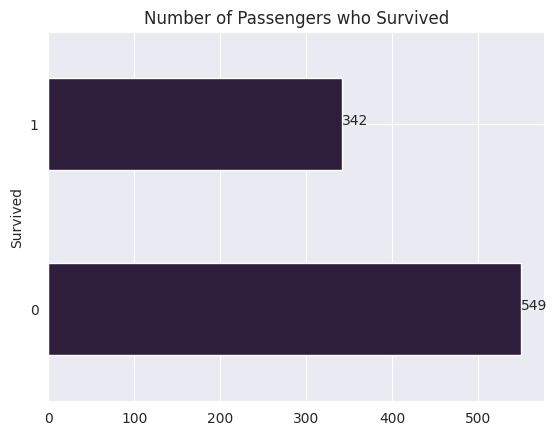

In [7]:
s0, s1 = data['Survived'].value_counts().values

data.Survived.value_counts().plot(kind= "barh", title= 'Number of Passengers who Survived')
plt.text(x= s0, y= 0, s= f'{s0}')
plt.text(x= s1, y= 1, s= f'{s1}')
plt.show()

In [8]:
# Function to Visualize Features
def visualize_f(kind, feature, data= data, order= None, rotate= None):
    statistics = data.groupby(feature).Survived.mean().reset_index()
    index, y_ratio = statistics[feature], statistics['Survived']
    
    if kind == "line":
        sns.lineplot(data= statistics, x= feature, y= "Survived")
    elif kind == "bar":
        sns.barplot(data= statistics, x= feature, y= "Survived", order= order)
    elif kind == "cat":
        sns.catplot(data, x= "Survived", y= feature)
        
        
    plt.title(f"Survived Ratio ({feature})")
    plt.ylabel("Survived Ratio")
    plt.xlabel(feature)
    plt.xticks(rotation= rotate)
    plt.show()

### Pclass Feature
Ticket class
- 1 = 1st
- 2 = 2nd
- 3 = 3rd

As we can see, the better class we have, the higher survival rate we will have.

__Strong Relationship with the Target__

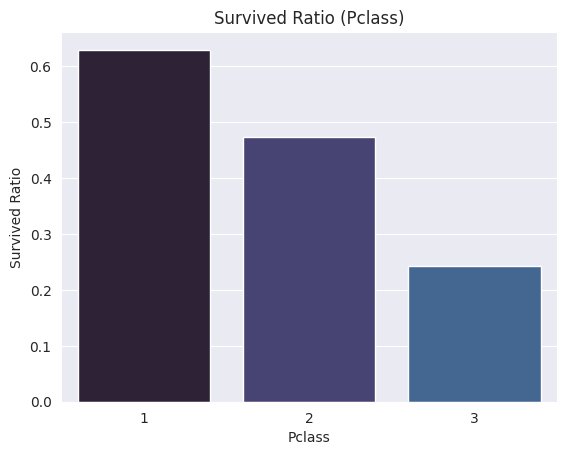

In [9]:
# Pclass Feature
visualize_f(kind= "bar", feature= "Pclass")

In [10]:
data.groupby('Pclass')['Survived'].agg(['count', 'mean'])

,count,mean
Pclass,,
1,216,0.629630
2,184,0.472826
3,491,0.242363


### Sex Feature

Like the last feature, we can see a clear difference between the survival rate of female and male.

__Strong Relationship with the Target__

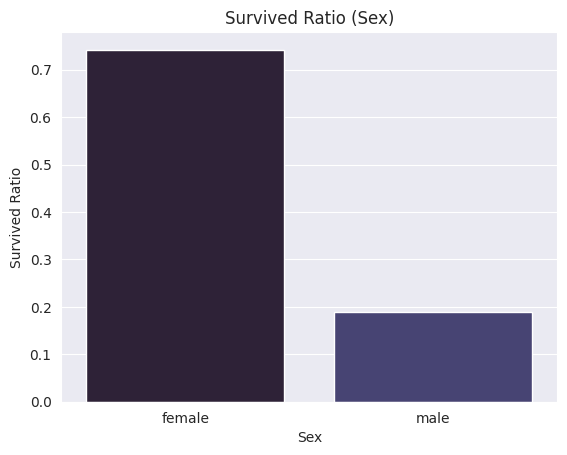

In [11]:
# Sex Feature
visualize_f(kind= "bar", feature= "Sex")

### Age Feature

As we can see, there are some peaks between people under 19 and over 50 years olds:
- under age < 19
- adult 19 - 65
- over age > 65

We could perform data engineering later using the previous classes.

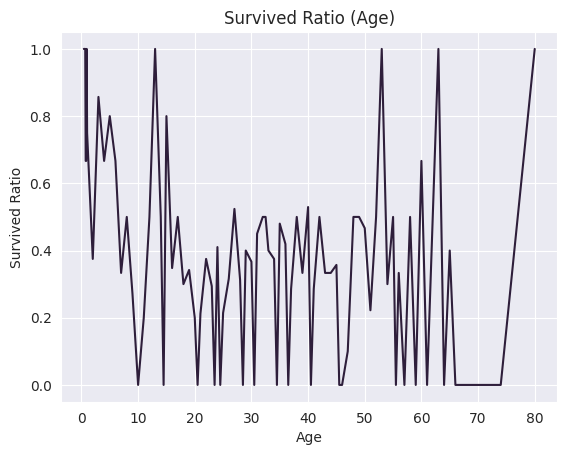

In [12]:
# Age Feature
visualize_f(kind= "line", feature= "Age")

Another way to divide  Ages into Ranges:

In [13]:
data['AgeRange'] = pd.qcut(data.Age, q= 8)
data.groupby('AgeRange')['Survived'].agg(['mean', 'count'])

,mean,count
AgeRange,,
"(0.419, 16.0]",0.519380,129
"(16.0, 20.0]",0.329897,97
"(20.0, 24.0]",0.325203,123
"(24.0, 28.0]",0.326733,101
"(28.0, 33.0]",0.398374,123
"(33.0, 38.0]",0.422680,97
"(38.0, 47.75]",0.339450,109
"(47.75, 80.0]",0.383929,112


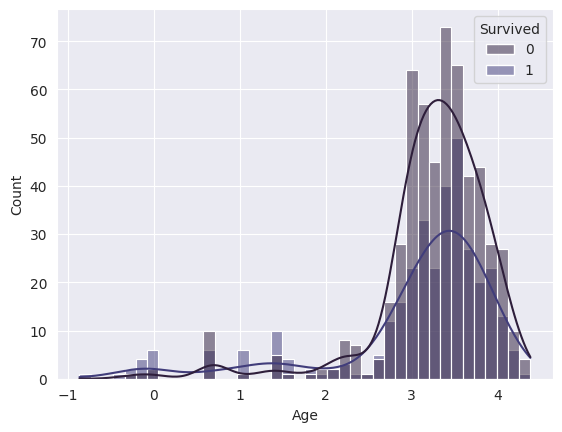

In [14]:
# Age Distribution
norm = np.log(data.Age) # Transform the data
sns.histplot(x= norm, kde= True, hue= data.Survived)
plt.show()

### SibSp Feature 

Number of siblings / spouses aboard the Titanic	

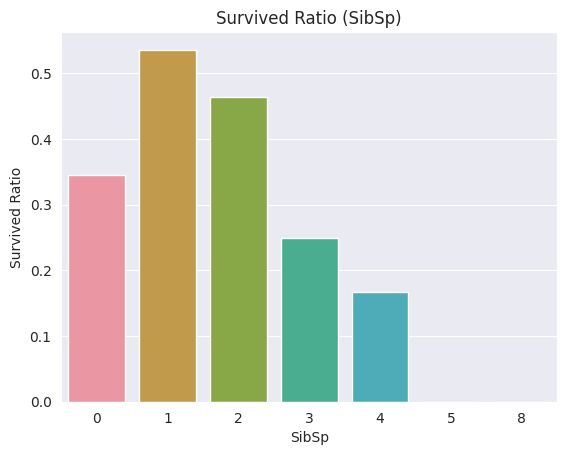

In [15]:
# SibSp Feature
visualize_f(kind= "bar", feature= "SibSp")

### Parch Feature

Number of parents / children aboard the Titanic	

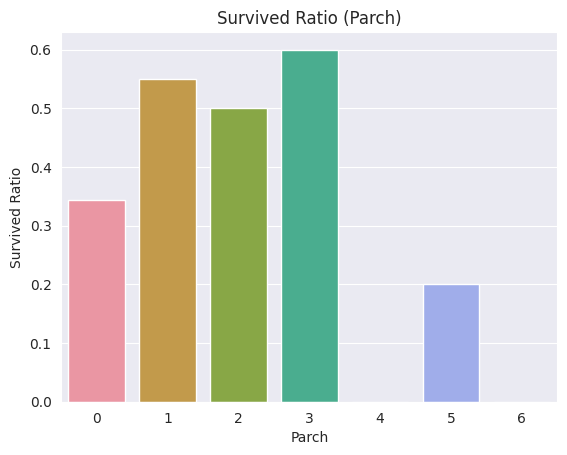

In [16]:
# Parch Feature
visualize_f(kind= "bar", feature= "Parch")

We can see some trends in the last variables, however we can create more variables by doing data engineering that will help us more.

### Cabin Feature

At this time we cannot visualize the Cabin feature as there are a couple of things to do with it. We need to clean the values and fill in the missing data, we will do this task in the next section.

### Fare Feature

At the moment, we can't seem to get anything useful out of this feature.

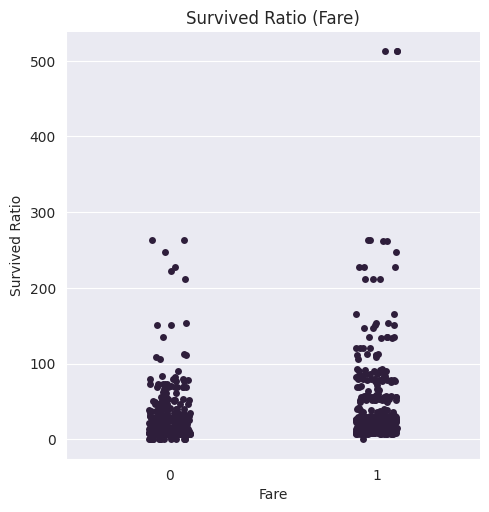

In [17]:
# Fare Feature
visualize_f(kind= "cat", feature= "Fare")

In [18]:
# Fare Ranges
data["FareRange"] = pd.qcut(data['Fare'], q= 4)
data.groupby('FareRange')['Survived'].agg(['count', 'mean'])

,count,mean
FareRange,,
"(-0.001, 7.91]",223,0.197309
"(7.91, 14.454]",224,0.303571
"(14.454, 31.0]",222,0.454955
"(31.0, 512.329]",222,0.581081


### Embarked Feature

Port of Embarkation:
- C = Cherbourg
- Q = Queenstown 
- S = Southampton

It seems that this feature can contribute something to our model. 

__Strong Relationship with the Target__

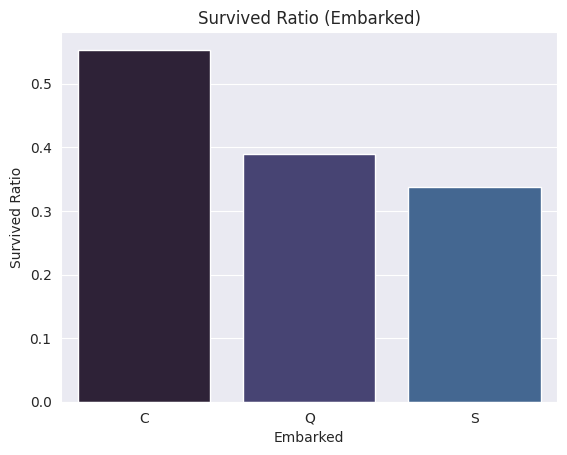

In [19]:
# Embarked Feature
visualize_f(kind= "bar", feature= "Embarked")

## 3. Data Engeneering 🤔🚀
In this section we will do data engineering and clean the data, and finally visualize the results of data engineering.
<hr>

#### Name
We can get several ideas from the names of the passengers, for example:

* PassengerTitle: We can extract all the passengers' titles and based on that we define the priority of each passenger. The following classes were made with ChatGPT.

    - Noble: 
        - The Countess
        - Lady
        - Sir
        - Don
        - Jonkheer
    - Professional:
        - Dr (Doctor)
        - Mme (Madame)
    - Military:
        - Major
        - Col
        - Capt
    - Common:
        - Mr
        - Mrs
        - Ms
        - Mlle
        - Miss
        - Master
     - Religious:
         - Rev

In [20]:
# Get Passenger Titles
data['PassengerTitle'] = data['Name'].str.split('.', expand= True)[0].str.split(', ', expand= True)[1].values

title_to_category = {
    'the Countess': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Don': 'Noble',
    'Dr': 'Professional',
    'Rev': 'Religious',
    'Major': 'Military',
    'Col': 'Military',
    'Mme': 'Professional',
    'Mr': 'Common',
    'Mrs': 'Common',
    'Ms': 'Common',
    'Capt': 'Military',
    'Mlle': 'Common',
    'Miss': 'Common',
    'Master': 'Common',
    'Jonkheer': 'Noble'
}

# Classify Titles
data['Class'] = data['PassengerTitle'].map(title_to_category)

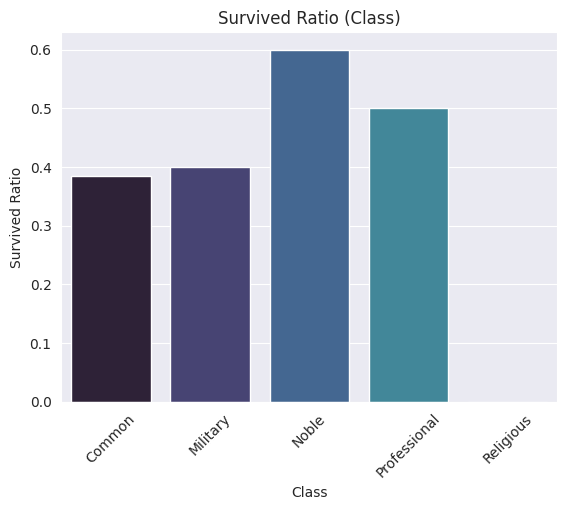

In [21]:
visualize_f(kind= "bar", feature= "Class", data= data, rotate= 45)

#### Age
First of all, let's define the age ranges:
- under age < 19
- adult 19 - 65
- over age > 65

You can experiment with different age ranges.

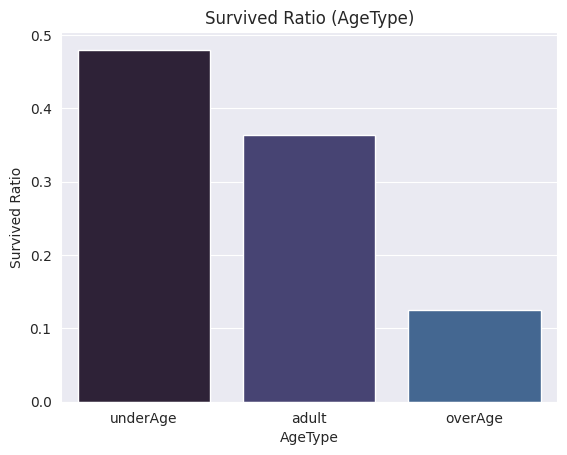

In [22]:
data.loc[:, "AgeType"] = "underAge"
data.loc[(data.Age >= 19) & (data.Age <= 65), "AgeType"] = "adult"
data.loc[(data.Age > 65), "AgeType"] = "overAge"

visualize_f(kind= "bar", feature= "AgeType", order= ['underAge','adult','overAge'])

#### Fare 
Just like we did before, we can split **Fare** feature into ranges:

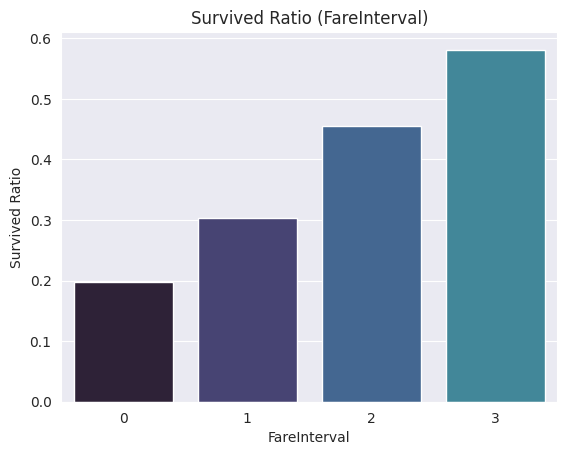

In [23]:
fareMap = {}
for i, interval in enumerate(pd.qcut(data['Fare'], q= 4).unique().sort_values()):
    fareMap[interval] = i

data['FareInterval'] = data['FareRange'].map(fareMap)
visualize_f(kind= "bar", feature= "FareInterval")

#### SibSp and Parch

Now it's the turn of the **SibSp** and **Parch** features. There are a few ideas I would like to try:
* Create a new numeric variable called 'TotalFamilyMembers' = SibSp + Parch
* Create another variable but this time it will be binary, 'hasFamilyAboard' = 1 if SibSp or Parch != 0 else 0

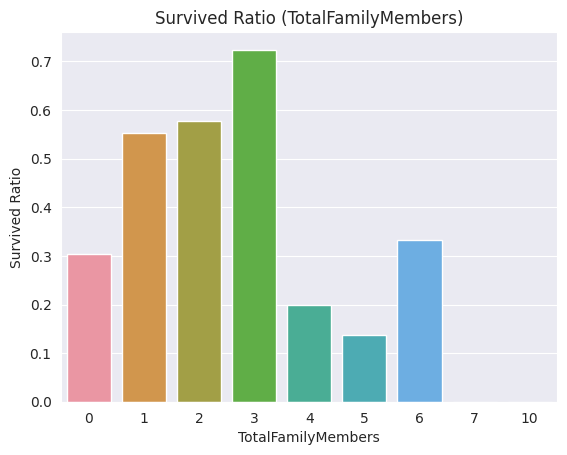

In [24]:
# Total Family Members (on board)
data.loc[:, "TotalFamilyMembers"] = data["Parch"] + data["SibSp"]

visualize_f(kind= "bar", feature= "TotalFamilyMembers")

Now we can also create a new feature called **FamilySize**, since we can see a good Survived Ratio between 1 to 3.

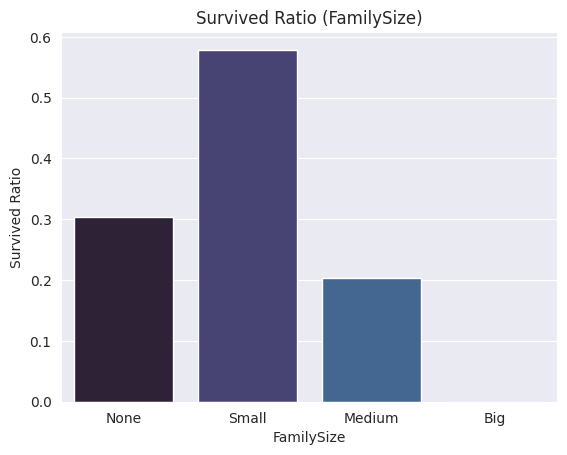

In [25]:
ranges = [-float('inf'), 0, 3, 6, float('inf')]
sizes = ['None', 'Small','Medium', 'Big']

data['FamilySize'] = pd.cut(data['TotalFamilyMembers'], bins= ranges, labels= sizes)
visualize_f(kind= "bar", feature= "FamilySize")

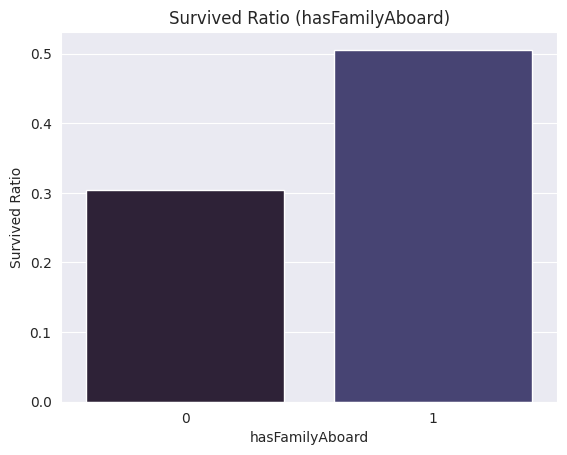

In [26]:
# Has Family Aboard
data.loc[:, "hasFamilyAboard"] = (data["TotalFamilyMembers"] > 0)
data["hasFamilyAboard"] = data["hasFamilyAboard"].astype(np.int32)

visualize_f(kind= "bar", feature= "hasFamilyAboard")

#### Cabin

Now in order to visualize the __Cabin__ feature much better, we need to clean up the values, since some people have more than one Cabin and there is also some noise in the data.

For instance:
* Na Values (Unassigned).
* More than one Cabin: 'B58 B60'
* Noise: 'F G73'

After solving the last problems, we can split it into **CabinLetter** and **ReservedCabins**.

In [27]:
# Fill Na values 
data['Cabin'] = data['Cabin'].fillna('Unassigned')

# Clean 'F Cabin' noise
data['Cabin'] = data['Cabin'].str.replace('F ', '')

In [28]:
# Get Cabin Letter
data['CabinLetter'] = data['Cabin'].str[0]

# Reserved Cabins
data['ReservedCabins'] = data['Cabin'].str.split(' ').str.len()
data.loc[ data['Cabin'] == 'Unassigned', 'ReservedCabins'] = 0   # Set 0 to Unassigned Cabins

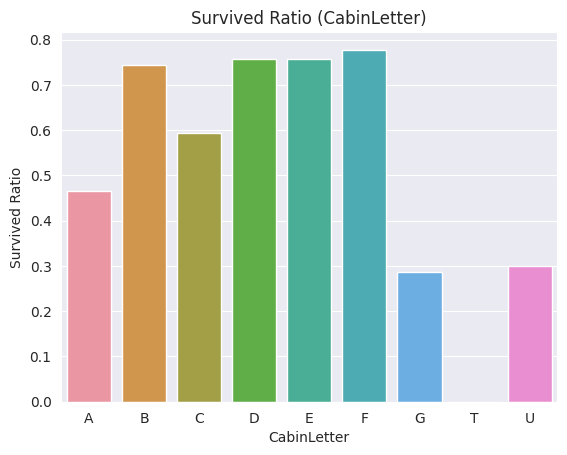

In [29]:
visualize_f(kind= "bar", feature= "CabinLetter")

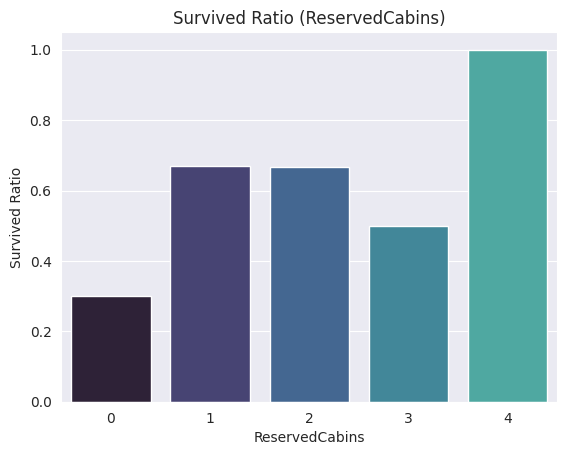

In [30]:
visualize_f(kind= "bar", feature= "ReservedCabins")

#### Ticket
- First, let's fill in the tickets without a place with a 'blank' value, for instance: **blank 211536**
- After that we can split it into **TicketPlace** and **TicketNumber**.

In [31]:
# Split and get Blank Tickets 
split_ticket = data['Ticket'].str.split(' ', expand= True)
blank_tickets = split_ticket[~split_ticket[1].notna()].index

# Add 'blank' value
data.loc[blank_tickets, 'Ticket'] = 'blank ' + data.loc[blank_tickets, 'Ticket'].values

# Ticket Place
data['TicketPlace'] = data['Ticket'].str.split(' ').str[0]
# Ticket Number
data['TicketNumber'] = data['Ticket'].str.split(' ').str[1]

Now we can try different things, like counting the number of digits in the **TicketNumber**.

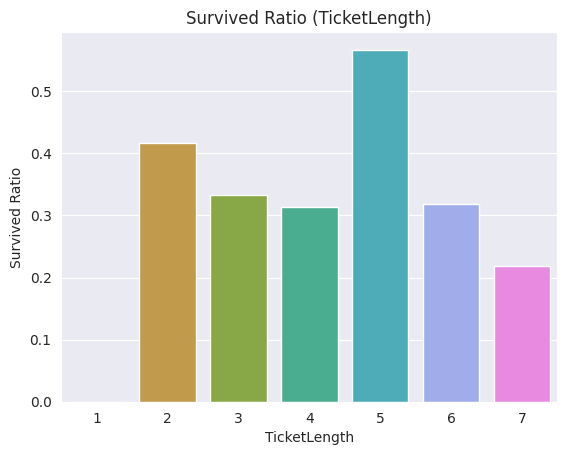

In [32]:
data['TicketLength'] = data['TicketNumber'].str.len()
visualize_f(kind= 'bar', feature= 'TicketLength', data= data)

#### Features we will use:
- Class
- AgeType
- FareInterval
- FamilySize
- hasFamilyAboard
- CabinLetter
- ReservedCabins
- TicketLength

## 4. Build a Class to perform the Preprocess Data ⚒🔨

Now, we will be developing a class to create the new variables and remove features that are not useful. 

In [33]:
from sklearn.base import TransformerMixin, BaseEstimator
import re

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, drop_columns= True):
        self.columns_to_remove = [1,3,9] # Name, Ticket, Cabin
        self.drop = drop_columns
    
    # Handle log( 0. ) errors
    def safe_log(self, x, epsilon= 1e-2):
        return np.log(x.astype(np.float32) + epsilon)

    def fit(self, X, y= None):
        return self
    
    
    def transform(self, X):
        # Total Family feature
        totalFamily = np.sum(X[:, [6,7]], axis= 1).reshape(-1,1)
        # FamilySize *
        family_conditions = [
            (totalFamily < 1),
            (np.logical_and(totalFamily >= 1, totalFamily <= 3)),
            (np.logical_and(totalFamily >= 4, totalFamily <= 6)),
            (totalFamily > 6),
        ]
        family_labels = ['None', 'Small', 'Medium','Big']
        familySize = np.select(family_conditions, family_labels, default= 'Unknown').reshape(-1,1)
        # Has Family feature *
        hasFamily = np.where(totalFamily > 0, 1, 0).reshape(-1,1)
        
        # Ages Type *
        agesRange = np.full((X.shape[0],1), "underAge")
        adult = np.where( (X[:, 5] >= 19) & (X[:, 5] <= 65) )
        overAge = np.where( (X[:, 5] > 65) )
        agesRange[adult, 0] = 'adult'
        agesRange[overAge, 0] = 'overAge'
        
        # Fare Intervals *
        fare = X[:, 8]
        fare_conditions = [
            (fare <= 7.91),
            (np.logical_and(fare > 7.91, fare <= 14.454)),
            (np.logical_and(fare > 14.454, fare <= 31.0)),
            (fare > 31.0),
        ]
        fare_labels = [0, 1, 2, 3]
        fareIntervals = np.select(fare_conditions, fare_labels, default= 'Unknown').reshape(-1,1)
        
        # Class *
        names = X[:, 1].astype(str)
        title = [re.search(r'\b((the )?\w+\.)', name).group().replace('.','') for name in names]
        classes = np.array([title_to_category[t] if t in set(title_to_category.keys()) else 'None'  for t in title]).reshape(-1,1) # We use the last dictionary we made to encode the titles as long as the title exists
        
        # Cabin Letter *
        cabin = X[:, 9].astype(str)
        cabin[cabin == 'nan'] = 'U'                                 # Fill nan values
        cabin = np.char.replace(cabin, old= 'F ', new= '')          # Clear the noise
        cabinLetter = np.array([c[0] for c in cabin]).reshape(-1,1) # Get cabin letter
        
        # Reserved Cabins *
        cabinsN = np.char.split(cabin, sep= ' ')
        reservedCabins = np.array([len(n) if n != 'U' else 0. for n in cabinsN], dtype= np.float32).reshape(-1,1)
        
        # Ticket Length *
        ticket = X[:, 3].astype(str)
        split_ticket = np.char.split(ticket, sep= ' ')
        ticketLength = np.array([ len(x[-1]) for x in split_ticket]).reshape(-1,1)
        
        
        if self.drop:
            self.columns_to_remove.extend([5,6,7,8]) # Age, SibSp, Parch, Fare
        X = np.delete(X, self.columns_to_remove, axis= 1)
        X = np.concatenate((X,familySize,hasFamily,agesRange,fareIntervals,classes,cabinLetter,reservedCabins,ticketLength), axis= 1)
        
        return X  # Final Data

# Class to remove some columns and avoid Multicollinearity
class MulticollinearityRemover(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.columns_to_exclude = [7,9,12,14,17]

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = np.delete(X, self.columns_to_exclude, axis=1)
        return X_transformed

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [35]:
# Define the Imputer
data_imputer = ColumnTransformer([
    ("Impute_Categorical", SimpleImputer(strategy= "most_frequent"), [0,1,2,6,9]),
    ("Impute_Numeric", SimpleImputer(strategy= "mean"), [3,4,5,7]),
], remainder= 'passthrough')

# Define the Scaler for Numeric data and Encoder for Categorical data
"""
    if drop_columns == True:
                           StandardScaler: [9] OneHotEncoder: [0,1,2,3,4,5,6,7,8,10]

    if drop_columns == False:
                            StandardScaler: [2,3,4,5,13] OneHotEncoder: [0,1,6,7,8,9,10,11,12,14]
"""
scale_encode_data = ColumnTransformer([
    ("StandardScaler", StandardScaler(), [9]),
    ("OneHotEncoder", OneHotEncoder(sparse_output= False), [0,1,2,3,4,5,6,7,8,10])
], remainder= 'passthrough')

# Data Preprocessing PipeLine
data_preprocessing = Pipeline([
    ("Scale_Encode_Data", scale_encode_data),
    #("Fix_Multicollinearity", MulticollinearityRemover())
])

# Define the Main PipeLine
prepare_data = Pipeline([
    ("Data_Imputation", data_imputer),
    ("Data_Engineering", CombinedAttributesAdder()),
    ("Data_Preprocessing", data_preprocessing)
])

In [36]:
x_training = training_set.drop(columns= ["Survived"], axis= 1)
x_training.loc[len(x_training)] = [1, 'Oliva y Ocana, Dona. Fermina', 'female', 39.0, 0, 0,'PC 17758', 108.9, 'C105', 'C'] # Add a Name without title
y_training = training_set.Survived.values

x_training = prepare_data.fit_transform(x_training.values)

## 5. Build the Model ⚙️🧰🔧
In this section we will try different things, such as:
- Voting Classifier (Hard Voting)
- Stacking Classifier
- Bagging (Using XGBoost)
- Pasting (Using XGBoost)

And finally we will take the best estimator and tune its hyperparameters with GridSearchCV.

In [37]:
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

In [38]:
# Split Data into training and validation set
x_train, x_val, y_train, y_val = train_test_split(x_training, y_training, train_size= 0.90)

print(f"Training: {x_train.shape}, Validation: {x_val.shape}")

Training: (756, 43), Validation: (85, 43)


In [39]:
# Estimators
log_clf = LogisticRegression()
svm_clf = SVC()
randomF_clf = RandomForestClassifier()
naiveBayes_clf = GaussianNB()
xgb_clf = XGBClassifier()

estimators_clf = [('Logistic', log_clf), ('SVM', svm_clf), ('RandomForest', randomF_clf), ('Naive Bayes', naiveBayes_clf), ('XGBoost', xgb_clf)]

### Voting

In [40]:
# Voting Classifier
voting_clf = VotingClassifier(
    estimators= estimators_clf,
    voting= 'hard'
)
voting_clf.fit(x_train, y_train)

score = voting_clf.score(x_val, y_val)
print(f'Stacking Clf Score: {score}')

Stacking Clf Score: 0.7647058823529411


### Stacking Classifiers
We will perform a **Hard Voting Classifier** using the estimator in **estimators_clf**.

In [41]:
stacking_clf = StackingClassifier(estimators= estimators_clf, cv= 5)
stacking_clf.fit(x_train, y_train)

score = stacking_clf.score(x_val, y_val)
print(f'Stacking Clf Score: {score}')

Stacking Clf Score: 0.8


### Bagging

In [42]:
bagging_clf = BaggingClassifier(estimator= XGBClassifier(), n_estimators= 500, n_jobs= -1, bootstrap= True)
bagging_clf.fit(x_train, y_train)

score = bagging_clf.score(x_val, y_val)
print(f'Stacking Clf Score: {score}')

Stacking Clf Score: 0.7764705882352941


### Pasting

In [43]:
pasting_clf = BaggingClassifier(estimator= XGBClassifier(), n_estimators= 500, n_jobs= -1, bootstrap= False)
pasting_clf.fit(x_train, y_train)

score = pasting_clf.score(x_val, y_val)
print(f'Pasting Clf Score: {score}')

Pasting Clf Score: 0.788235294117647


Since **Stacking** is the best estimator, we will now perform GridSearch to tune its hyperparameters.

In [44]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [45]:
# Classifier
classifier = Pipeline(steps= [
    ("PCA", PCA()),
    ("Estimator", stacking_clf)
])

# Parameters
params = {
    'PCA__n_components': [10,15],
    'Estimator__SVM__C': [1.0, 2.0],
    'Estimator__RandomForest__n_estimators': [100,300],
    'Estimator__XGBoost__n_estimators': [100,300],
}

# Grid Search
gridSearch = GridSearchCV(estimator= classifier, param_grid= params, cv= 5, n_jobs= -1, scoring= 'accuracy')
gridSearch.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('PCA', PCA()),
                                       ('Estimator',
                                        StackingClassifier(cv=5,
                                                           estimators=[('Logistic',
                                                                        LogisticRegression()),
                                                                       ('SVM',
                                                                        SVC()),
                                                                       ('RandomForest',
                                                                        RandomForestClassifier()),
                                                                       ('Naive '
                                                                        'Bayes',
                                                                        GaussianNB()),
                                                                       ('XGBoost',
                                                                        XGBClassifier(base_score=None,
                                                                                      booster=None,
                                                                                      callbacks=None,
                                                                                      colsample_bylevel=None,
                                                                                      colsample_bynode=None,
                                                                                      colsample...
                                                                                      min_child_weight=None,
                                                                                      missing=nan,
                                                                                      monotone_constraints=None,
                                                                                      multi_strategy=None,
                                                                                      n_estimators=None,
                                                                                      n_jobs=None,
                                                                                      num_parallel_tree=None,
                                                                                      random_state=None, ...))]))]),
             n_jobs=-1,
             param_grid={'Estimator__RandomForest__n_estimators': [100, 300],
                         'Estimator__SVM__C': [1.0, 2.0],
                         'Estimator__XGBoost__n_estimators': [100, 300],
                         'PCA__n_components': [10, 15]},
             scoring='accuracy')

In [46]:
gridSearch.best_params_

{'Estimator__RandomForest__n_estimators': 100,
 'Estimator__SVM__C': 2.0,
 'Estimator__XGBoost__n_estimators': 100,
 'PCA__n_components': 10}

In [47]:
best_model = gridSearch.best_estimator_

score = best_model.score(x_val, y_val)
print(f'Best Estimator Score: {score}')

Best Estimator Score: 0.7764705882352941


## 6. Evaluate the Model 🤖🔍📑
Now is the time to evaluate the model with the **Test set** that we defined at the beginning of the notebook and see if the model generalizes well.

In [48]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

### Visualize ROC Curve (Training set)

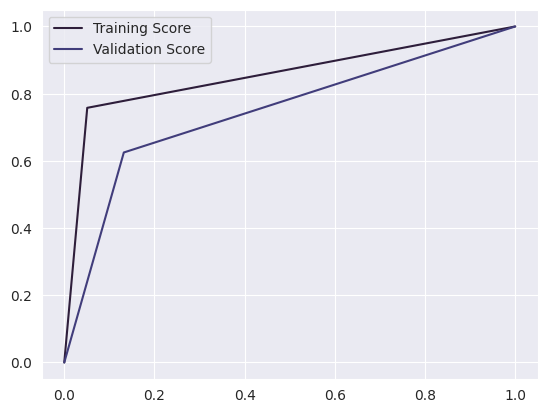

In [49]:
train_pred = best_model.predict(x_train)
fpr_t, tpr_t, _ = roc_curve(y_train, train_pred)

val_pred = best_model.predict(x_val)
fpr_v, tpr_v, _ = roc_curve(y_val, val_pred)

sns.lineplot(x=fpr_t, y=tpr_t, label= "Training Score")
sns.lineplot(x=fpr_v, y=tpr_v, label= "Validation Score")
plt.show()

### Evaluate the Testing set

In [50]:
# Evaluate with the testing set
x_test = prepare_data.transform(testing_set.drop("Survived", axis= 1).values)
y_test = testing_set.Survived.values

predictions = best_model.predict(x_test)
cm = confusion_matrix(y_test, predictions)
accuracy = (cm[0,0] + cm[1,1]) / np.sum(cm)

print(cm)
print(f'Testing set Accuracy: {accuracy}')

[[23  2]
 [ 8 17]]
Testing set Accuracy: 0.8


### Precision/Recall Trade-off
We can still improve the **Accuracy** of the test set a little by taking into account the **Precision/Recall Trade-off**:

$precision= ~\frac{TP}{TP~+~FP}$

$recall= ~\frac{TP}{TP~+~FN}$

To correctly adjust the threshold we will use the entire data set.

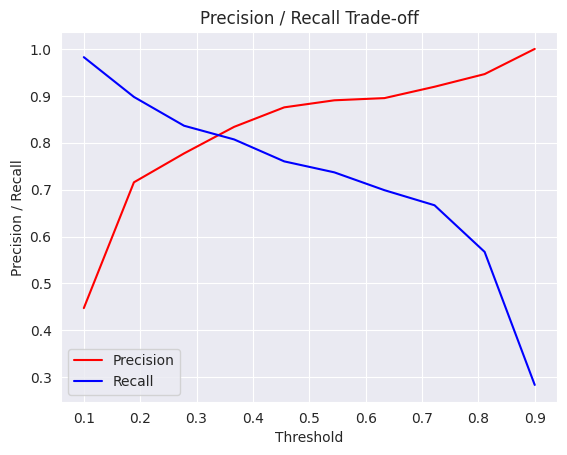

In [51]:
# Define a list with 10 thresholds
threshold = np.linspace(start= 0.1, stop= .9, num= 10)

# Get the entire data set
data = prepare_data.transform(titanic_data.drop(columns= ["Survived"], axis= 1).values)
targets = titanic_data.Survived.values

precision = []
recall = []
for i, thr in enumerate(threshold):
    prob = best_model.predict_proba(data)[:, 1]
    y_pred = (prob > thr)
    
    cm = confusion_matrix(targets, y_pred)
    precision.append( cm[1,1] / (cm[1,1] + cm[0,1]) )
    recall.append( cm[1,1] / (cm[1,1] + cm[1,0]) )

# Plot the trade-off
sns.lineplot(x= threshold, y= precision, label= 'Precision', c= 'red')
sns.lineplot(x= threshold, y= recall, label= 'Recall', c= 'blue')

plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Precision / Recall')
plt.title("Precision / Recall Trade-off")
plt.show()

As we can see, the perfect balance is approximately at a threshold of 0.35.  Based on that, let's predict the test set once again.

In [52]:
# Test set
prob_t = best_model.predict_proba(x_test)[:, 1]
test_pred = (prob_t > 0.35)

cm = confusion_matrix(y_test, test_pred)
test_accuracy = (cm[0,0] + cm[1,1]) / (np.sum(cm))

print(cm)
print(f'Testing set Accuracy: {test_accuracy}')

[[21  4]
 [ 6 19]]
Testing set Accuracy: 0.8


It's not much but at least it's an improvement. 😃🎉

## 7. Make the Predictions 👽👻
Finally, we will predict the data set that we will upload to the competition taking into account the best threshold.

In [53]:
# Load and predict the testing set
testing = pd.read_csv("/kaggle/input/titanic/test.csv", index_col= 0)
x_testing = prepare_data.transform(testing.values)


proba_pred = best_model.predict_proba(x_testing)[:, 1]
predictions = (proba_pred > 0.35)

# Create the DataFrame
submit_predictions = pd.DataFrame(np.c_[testing.index.values,predictions], columns= ["PassengerId", "Survived"]).set_index('PassengerId')
submit_predictions

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [54]:
submit_predictions.to_csv("Titanic_Predictions.csv")